In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import power_transform
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
ad=pd.read_csv("Advertising.csv")

In [4]:
ad.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
ad.tail(10)

,Unnamed: 0,TV,radio,newspaper,sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
ad.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
62,63,239.3,15.5,27.3,15.7
34,35,95.7,1.4,7.4,9.5
157,158,149.8,1.3,24.3,10.1
103,104,187.9,17.2,17.9,14.7
112,113,175.7,15.4,2.4,14.1


In [7]:
ad.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [8]:
ad.shape

(200, 5)

In [9]:
ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
ad.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
ad=pd.DataFrame(data=ad)

In [14]:
ad

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [15]:
ad.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [18]:
ad.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [19]:
ad['TV'].value_counts(dropna=False)

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64

In [20]:
ad['radio'].value_counts(dropna=False)

4.1     3
5.7     3
1.5     2
2.6     2
41.7    2
       ..
14.8    1
8.6     1
11.8    1
45.1    1
36.5    1
Name: radio, Length: 167, dtype: int64

In [21]:
ad['newspaper'].value_counts(dropna=False)

25.6    3
9.3     3
8.7     3
7.4     2
22.9    2
       ..
2.4     1
13.8    1
1.8     1
57.6    1
19.4    1
Name: newspaper, Length: 172, dtype: int64

In [22]:
ad['sales'].value_counts(dropna=False)

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64

<AxesSubplot:xlabel='sales', ylabel='Density'>

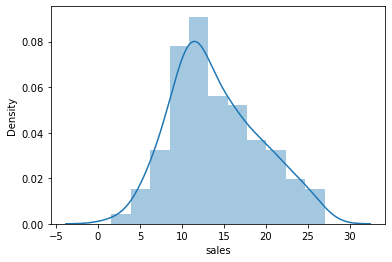

In [23]:
sns.distplot(ad['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

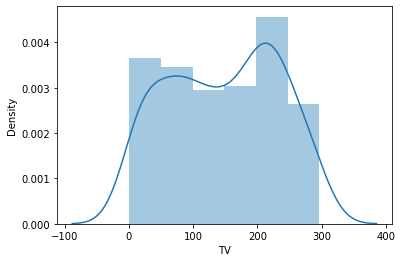

In [24]:
sns.distplot(ad['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

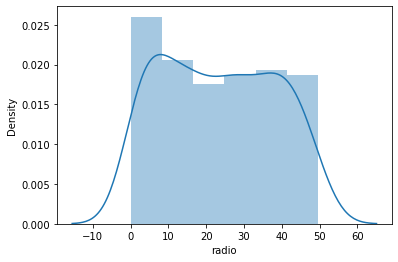

In [25]:
sns.distplot(ad['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

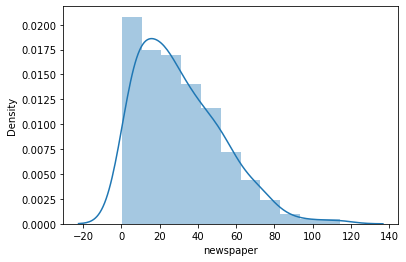

In [26]:
sns.distplot(ad['newspaper'])

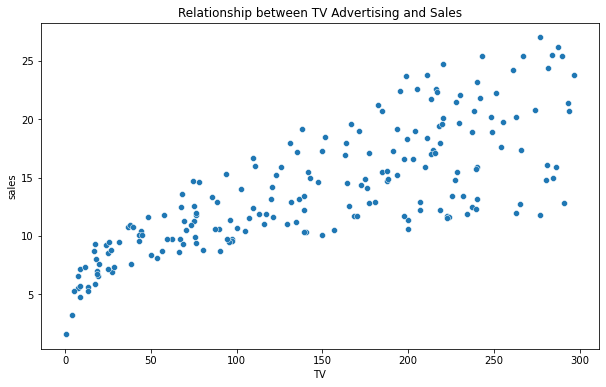

In [27]:
plt.figure(figsize=[10,6])
plt.title('Relationship between TV Advertising and Sales')
sns.scatterplot(ad['TV'], ad['sales']);

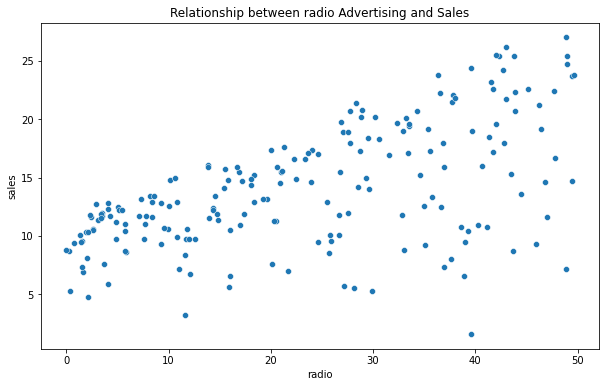

In [28]:
plt.figure(figsize=[10,6])
plt.title('Relationship between radio Advertising and Sales')
sns.scatterplot(ad['radio'], ad['sales']);

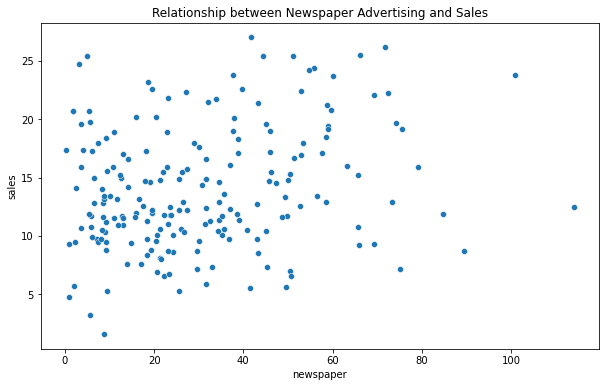

In [29]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Newspaper Advertising and Sales')
sns.scatterplot(ad['newspaper'], ad['sales']);

In [31]:
corr_mat=ad.corr()
corr_mat

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


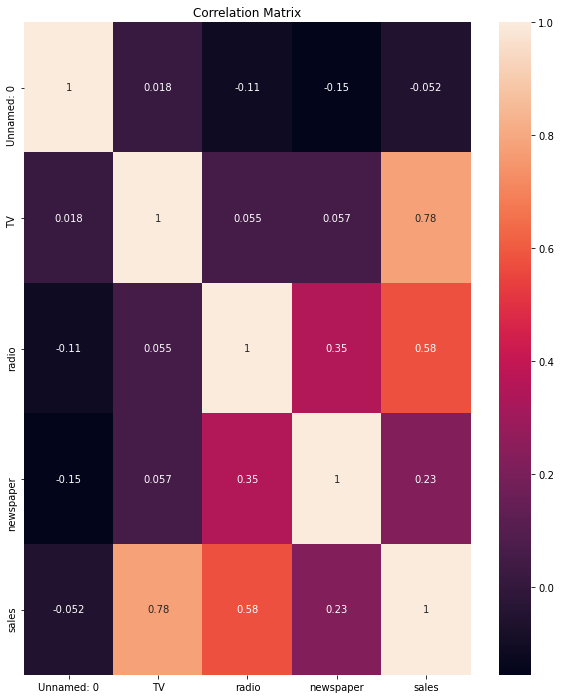

In [32]:
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

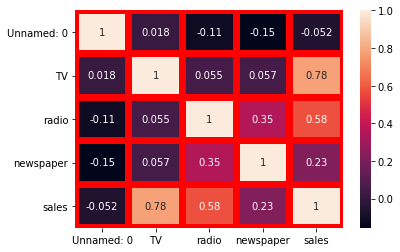

In [33]:
sns.heatmap(corr_mat,annot=True,linewidths=6,linecolor='r')

In [34]:
corr_mat["sales"].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

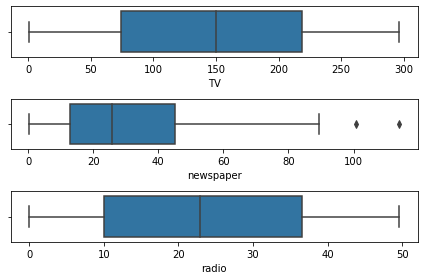

In [36]:
fig, axs = plt.subplots(3, figsize = (6,4))
plt1 = sns.boxplot(ad['TV'],ax = axs[0])
plt2 = sns.boxplot(ad['newspaper'],ax = axs[1])
plt3 = sns.boxplot(ad['radio'],ax = axs[2])
plt.tight_layout()

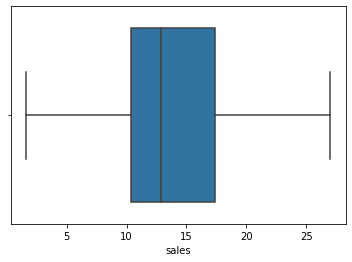

In [38]:
sns.boxplot(ad['sales'])
plt.show()

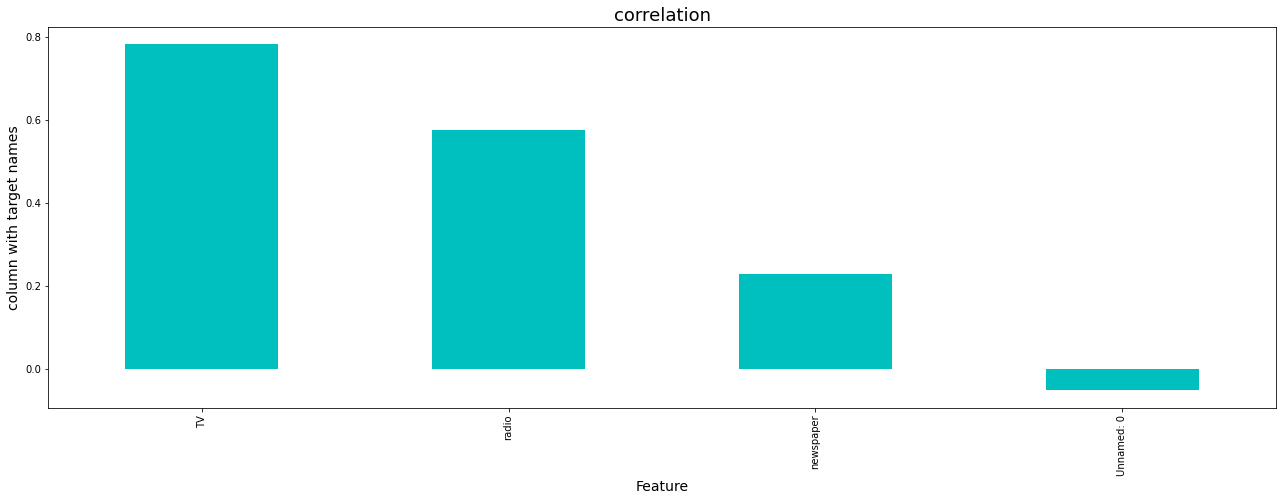

In [39]:
plt.figure(figsize=(22,7))
ad.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [40]:
x=ad.drop("sales",axis=1)
y=ad["sales"]

In [42]:
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [43]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [44]:
x.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
dtype: float64

In [46]:
ad_skew=power_transform(x)

ad_skew=pd.DataFrame(ad_skew,columns=x.columns)

In [48]:
ad_skew.skew()

Unnamed: 0   -0.268270
TV           -0.315199
radio        -0.242968
newspaper    -0.077942
dtype: float64

In [52]:
df=ad_skew
x=ad_skew

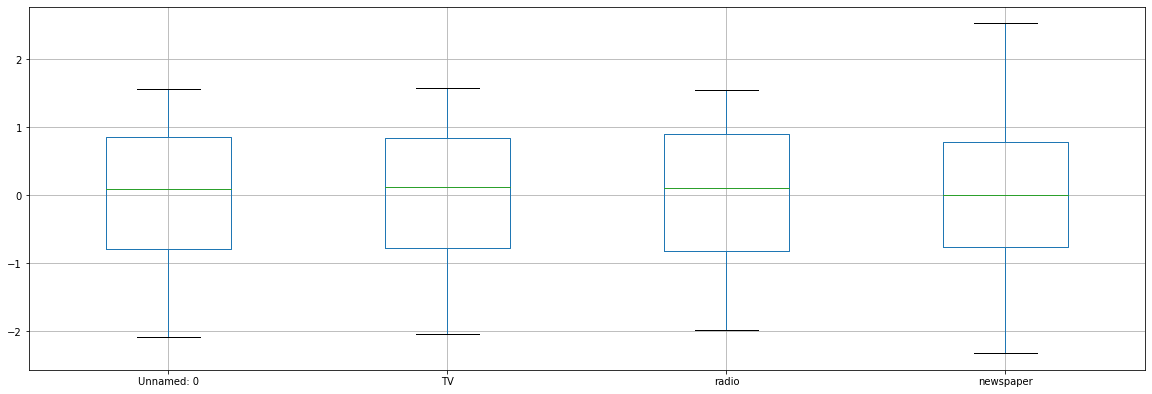

In [53]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

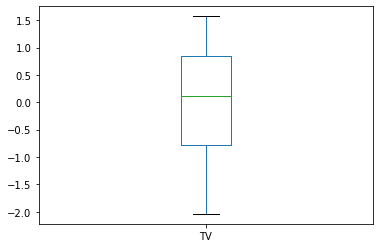

In [54]:
df['TV'].plot.box()

<AxesSubplot:>

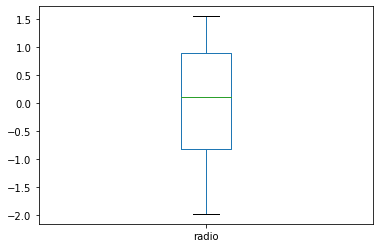

In [55]:
df['radio'].plot.box()

<AxesSubplot:>

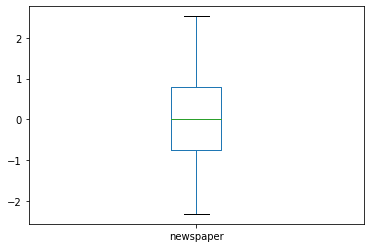

In [56]:
df['newspaper'].plot.box()

In [57]:
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[-2.07937596,  0.94867429,  0.96224689,  1.51433531],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [-1.990711  , -1.6477566 ,  1.37070964,  1.51699753],
       [-1.95139683,  0.14102023,  1.14238689,  1.21465643],
       [-1.91424742,  0.45271493, -0.74865064,  1.21170398],
       [-1.87880665, -1.82382233,  1.51501853,  1.66502354],
       [-1.8447658 , -1.00249116,  0.69372704, -0.1077535 ],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-1.7800535 , -1.82609501, -1.63345378, -2.13259669],
       [-1.74908785,  0.64764492, -1.56676988, -0.22900395],
       [-1.71890445, -0.88377378, -1.20298758, -0.07226156],
       [-1.68942058,  0.79708355,  0.18072579, -1.60261898],
       [-1.66056789, -1.52641627,  0.81900563,  1.42512925],
       [-1.63228912, -0.48036844, -1.02813642, -1.22982506],
       [-1.60453563,  0.69106577,  0.6992403 ,  0.81860579],
       [-1.57726567,  0.60295713,  1.45770359,  1.04432344],
       [-1.55044308, -0.

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=100)

In [59]:
x_train

array([[ 1.13097805,  0.80403524,  0.15589202,  1.18797267],
       [ 0.29501575,  0.39948386, -0.39353456, -1.84832983],
       [ 1.1733481 ,  0.28112073, -0.01596668,  0.86598739],
       [ 1.31311888,  0.83474968, -1.2441519 ,  0.08265171],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-0.86809891, -0.57689562, -0.82396106,  0.43960934],
       [-0.32240015, -1.65352738,  1.26263268,  2.01064695],
       [-1.25479261,  1.12918152,  0.3682981 , -0.1386789 ],
       [-1.23184753, -0.82328646, -0.35021379,  0.63452018],
       [ 1.5052498 , -1.28790757, -1.43143631, -0.68257581],
       [-0.99154687,  0.67493776,  0.07409584,  0.27034854],
       [ 0.91586774,  0.35322947,  1.0607726 ,  0.51793191],
       [ 0.3423642 , -0.76380392,  0.81362329,  1.03804144],
       [-0.52112616, -0.08546826,  1.21783637,  0.15154706],
       [-0.61449437,  0.75724354,  0.50813245, -1.03293213],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [ 1.4644109 , -1.

In [60]:
x_test

array([[ 0.51314709, -1.84451116,  1.01950683,  0.9711866 ],
       [ 0.16700133,  1.02732204,  0.77578583, -1.4371576 ],
       [ 0.08561471, -0.03924063,  1.16260524,  0.8151881 ],
       [-0.03025972,  0.8268345 ,  0.7321905 ,  1.22937273],
       [ 0.27915542,  1.06108536,  0.97270342, -0.12315678],
       [ 1.11680812,  0.71820605, -1.26510158, -0.32944703],
       [ 0.35807091,  0.00550359, -0.4745618 , -0.00306944],
       [ 0.03623994,  0.62533398, -1.4550585 , -1.3679351 ],
       [-0.74892445,  0.81395585,  1.16260524,  0.59004665],
       [-0.42972675,  0.81792069,  1.2725405 ,  0.07329661],
       [ 1.07415613, -0.24514238, -0.44484785, -1.42534498],
       [ 0.48241246,  0.94281959,  0.66606674,  1.64467302],
       [ 1.3269763 , -1.02082882, -1.21318999,  0.18741746],
       [ 0.93038512,  0.52513474, -0.00296885, -1.01553176],
       [ 0.49779678, -0.60829585, -0.66750027,  0.01146189],
       [ 1.51882384, -0.52094879, -1.29701657, -1.14201102],
       [ 1.49165638,  0.

In [61]:
y_train

168    17.1
112    14.1
171    14.5
181    12.2
7      13.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: sales, Length: 160, dtype: float64

In [62]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
Name: sales, dtype: float64

In [63]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

0.9257857600065251
1.5771226395503344
1.2558354348999452


In [64]:
scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  0.8953473674194841


In [65]:
r = Ridge()
r.fit(x_train,y_train)
predr = r.predict(x_test)
print(r2_score(y_test,predr))
print(mean_squared_error(y_test,predr))
print(np.sqrt(mean_squared_error(y_test,predr)))

0.9248076816915092
1.5979077268058348
1.264083749917637


In [66]:
scr = cross_val_score(r,x,y,cv=5)
print('Cross validation score for Ridge Regression Model is', scr.mean())

Cross validation score for Ridge Regression Model is 0.8953866482738437


In [67]:
l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
print(r2_score(y_test,predl))
print(mean_squared_error(y_test,predl))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.82858513530148
3.6427276476221087
1.9085931068779718


In [68]:
scr = cross_val_score(l,x,y,cv=5)
print('Cross validation score for Lasso Regression Model is ', scr.mean())

Cross validation score for Lasso Regression Model is  0.8270960357806553


In [69]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

0.9829808334982769
0.36167335000000034
0.6013928416600919


In [70]:
scr = cross_val_score(rf,x,y,cv=5)
print('Cross validation score for Random Forest Regressor Model is', scr.mean())

Cross validation score for Random Forest Regressor Model is 0.9721668264553779


In [71]:
parameters1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'selection': ['cyclic','random']}
GCV=GridSearchCV(Lasso(),parameters1,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
                         'max_iter': [200, 900],
                         'random_state': [200, 700, 900],
                         'selection': ['cyclic', 'random']})

In [72]:
GCV.best_params_

{'alpha': 4.0, 'max_iter': 200, 'random_state': 200, 'selection': 'cyclic'}

In [73]:
mod1=Lasso(alpha=4.0,random_state=200,selection='cyclic',max_iter=200)

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(r2_score(y_test,predrf)*100)
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

98.29808334982769
0.36167335000000034
0.6013928416600919


In [74]:
import joblib
joblib.dump(mod1,"Advertising_Sales_Lasso.pkl")

['Advertising_Sales_Lasso.pkl']